In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Directories for the images

# Directories for each class
kapha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\kapha'
pittha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\pittha'
vata_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\vata'



# Load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize to 128x128
            images.append((img, label))  # Append image and its label as tuple
    return images

# Load images
kapha_images = load_images_from_folder(kapha_dir, 0)  # Label 0 for benign
pittha_images = load_images_from_folder(pittha_dir, 1) 
vata_images =load_images_from_folder(vata_dir, 2) # Label 1 for malignant


# Data Augmentation
import cv2
import random

import cv2
import random
import numpy as np

def augment_images(images, label):
    augmented_images = []
    for img, _ in images:
        # Get image dimensions
        h, w = img.shape[:2]
        
        # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))
         # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))

    return augmented_images



# Apply augmentation to both benign and malignant images
augmented_kapha_images = augment_images(kapha_images, 0)  # Label 0 for benign
augmented_pittha_images = augment_images(pittha_images, 1)  # Label 1 for malignant
augmented_vata_images = augment_images(vata_images, 2)  # Label 1 for malignant

# Combine original and augmented images
data = kapha_images + pittha_images + vata_images + augmented_pittha_images+augmented_kapha_images+augmented_vata_images
X, y = zip(*data)  # Unzip the list of tuples into separate lists
X = np.array(X)
y = np.array(y)


# Normalize images for VGG-16
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X = X / 255.0  # Scale pixel values to [0, 1]

# Reshape X to 128x128x3 for VGG-16 input (duplicate channels if grayscale)
X_reshaped = np.repeat(X, 3, axis=-1) if X.shape[-1] == 1 else X

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.3816 - loss: 2.3835
Epoch 1: val_accuracy improved from -inf to 0.65714, saving model to best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3839 - loss: 2.3568 - val_accuracy: 0.6571 - val_loss: 0.8898
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.6085 - loss: 0.8605
Epoch 2: val_accuracy improved from 0.65714 to 0.76000, saving model to best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6106 - loss: 0.8578 - val_accuracy: 0.7600 - val_loss: 0.6746
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - accuracy: 0.7249 - loss: 0.6676
Epoch 3: val_accuracy improved from 0.76000 to 0.81143, saving model to best_model.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 984ms/step - accuracy: 0.7265 - loss: 0.6654 - val_accuracy: 0.8114 - val_loss: 0.5458
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.8257 - loss: 0.4938
Epoch 4: val_accuracy improved from 0.81143 

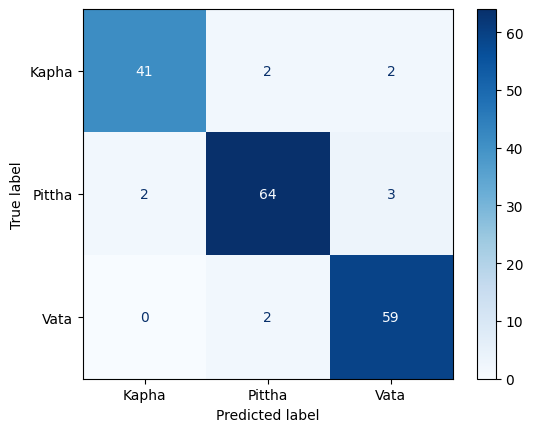

Accuracy: 93.71%


In [2]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Build the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers on top of VGG16
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Add a dense layer for feature learning
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
output_layer = Dense(3, activation='softmax')(x)  # Output layer for 3 classes
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up model checkpointing to save the best model
checkpoint_filepath = 'best_model.keras'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint_callback]
)

# Load the best model
best_model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate the best model on test data
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Kapha', 'Pittha', 'Vata'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the training history
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [3]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


In [5]:
from tensorflow.keras.applications import VGG16  # Import VGG16 model

# Build the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers on top of VGG16
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Add a dense layer for feature learning
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
output_layer = Dense(3, activation='softmax')(x)  # Output layer for 3 classes
model = Model(inputs=base_model.input, outputs=output_layer)

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,867 (64.14 MB)

 Trainable params: 2,098,179 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)